In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#Define the ODE function
def NH4_dyn(ivalues, tspan, myParams):
    # unpack initial concentrations
    NH4_ext, NH4_in = ivalues

    # unpack kinetic rate parameters
    P_VA, pH_ext, pH_in, pK, k1, kbm, kN_in, kN = myParams

    k_ext = 10**(pH_ext - pK)   #dissociation constant in the env - based on pH and pKa
    k_in = 10**(pH_in - pK)     #dissociation constant in the cell - based on pH and pKa

    diff_in = P_VA * (k_ext * NH4_ext - k_in * NH4_in) #Diffusion of NH3 (calculated from NH4+) into and out of the cell

    dNH4_ext = kN - diff_in - (NH4_ext * k1)                        #rate of change in external NH4+: const. production, diffusion in as loss, active uptake as loss
    dNH4_in = kN_in + diff_in - (NH4_in * kbm) + (NH4_ext * k1)     #rate of change in internal NH4+: const. production, diffusion in, active uptake, assimilation as loss

    return [dNH4_ext, dNH4_in]

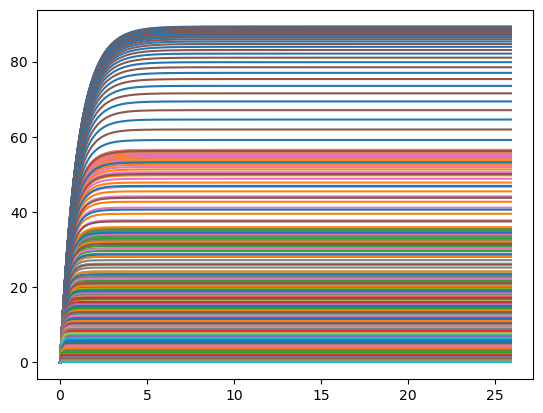

[[23400000.0,
  7.600000000000002,
  7,
  9.25,
  10000.0,
  100,
  90,
  0,
  0.2218351580972185,
  0.9000000000000009],
 [23400000.0,
  7.8000000000000025,
  7,
  9.25,
  10000.0,
  100,
  90,
  0,
  0.14094281964132271,
  0.9000000000000009]]

In [13]:
# rate parameters
P = 4.68*10**6  # um/hr, NH3 permeability - based on 0.13cm/sec from Kim et al
VA = 0.2  # um, ratio of cell volume to area (V/A)

P_VA = P / VA  # 1/hr rate diffusion of NH3
pH_ext = np.arange(5, 8, 0.2)  # no unit external pH
pH_in = 7  # no unit internal pH
pK = 9.25  # no unit pK for ammonia (NH3) - ammonium (NH4+)
k1 = np.logspace(start=1,stop=4,num=50,base=10)  # 1/hr active uptake rate matching Kbm and diffusion
kbm = 1*10**(2) # 1/hr growth incorporation of N 
kN_in = 90 # uM/hr N production in the cell (from nitrate from outside) (2.5 mM NO3 consumption over 28hrs must all be processed through nitrate reduction. 2500/28 = 89.29)
kN = 0  # uM/hr influx of N into media

# time interval
t0 = 0
tf = 25 #hours
tspan = np.arange(t0, tf+1, 0.1)

fig = plt.figure()
ax = fig.add_subplot(111)
# Run for loop over parameters
results = []
for k1_val in k1:
    for pH_val in pH_ext:
        myParams = [P_VA, pH_val, pH_in, pK, k1_val, kbm, kN_in, kN]
        ivalues = [0, 0]
        solution = odeint(NH4_dyn, ivalues, tspan, args=(myParams,))
        ax.plot(tspan,solution[:,0])
        results.append([*myParams, *solution[-1]])
plt.show()
NH4_ext_matrix = np.array([res[8] for res in results]).reshape(len(k1), len(pH_ext))

results[-2:][:]


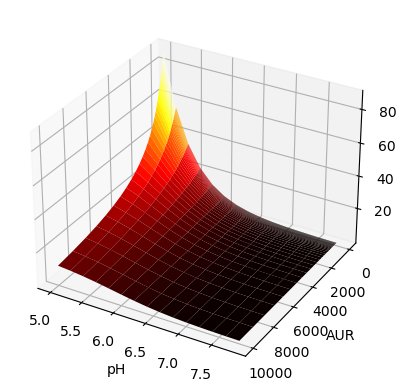

In [4]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
PH, K1 = np.meshgrid(pH_ext, k1)
ax.plot_surface(PH, K1, NH4_ext_matrix, cmap='hot')
ax.set_xlabel('pH')
ax.set_ylabel('AUR')
ax.set_zlabel('NH4_ext')
ax.set_ylim(ax.get_ylim()[::-1])
#ax.yaxis.set_scale('log')
#plt.gca().invert_yaxis()
plt.show()
fig.savefig("BacillusPHbyActiveUptake.png")

[[23400000.0,
  7.600000000000002,
  7,
  9.25,
  100,
  1000.0,
  9e-06,
  0,
  2.260266325161455e-09,
  8.999999999999998e-09],
 [23400000.0,
  7.8000000000000025,
  7,
  9.25,
  100,
  1000.0,
  9e-06,
  0,
  1.4262320925233024e-09,
  9.000000000000001e-09]]

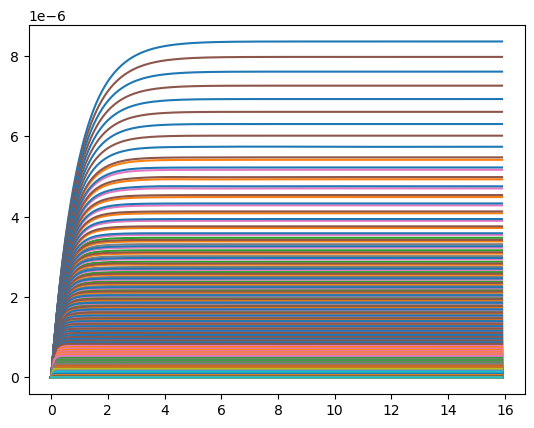

In [14]:
# rate parameters
P = 4.68*10**6  # um/hr, NH3 permeability
#VA = 200000  # um, ratio of cell volume to area (V/A) (multiplied by the number of cells)
VA = 0.2  # um, ratio of cell volume to area (V/A)

P_VA = P / VA  # 1/hr rate diffusion of NH3
pH_ext = np.arange(5, 8, 0.2)  # no unit external pH
pH_in = 7  # no unit internal pH
pK = 9.25  # no unit pK for ammonia (NH3) - ammonium (NH4+)
k1 = 10**(2)  # 1/hr active uptake rate
kbm = np.logspace(start=2,stop=3,num=50,base=10)  # 1/hr active uptake rate
kN_in = 90 # uM/hr N production in the cell (from nitrate from outside)
kN = 0  # uM/hr influx of N into media

# time interval
t0 = 0
#tf = 28
#tspan = np.arange(t0, tf+1, 28)
tf = 15 #hours
tspan = np.arange(t0, tf+1, 0.1)

fig = plt.figure()
ax = fig.add_subplot(111)
# Run for loop over parameters
results = []
for kbm_val in kbm:
    for pH_val in pH_ext:
        myParams = [P_VA, pH_val, pH_in, pK, k1, kbm_val, kN_in, kN]
        ivalues = [0, 0]
        solution = odeint(NH4_dyn, ivalues, tspan, args=(myParams,))
        ax.plot(tspan,solution[:,0])
        results.append([*myParams, *solution[-1]])

NH4_ext_matrix = np.array([res[8] for res in results]).reshape(len(kbm), len(pH_ext))

results[-2:][:]

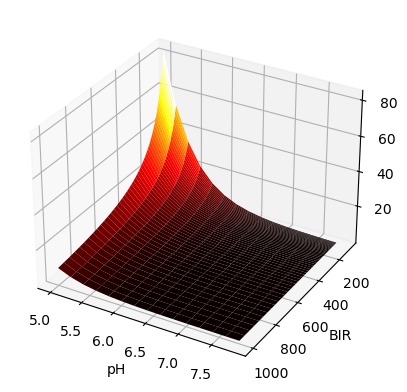

In [15]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
PH, KBM = np.meshgrid(pH_ext, kbm)
ax.plot_surface(PH, KBM, NH4_ext_matrix, cmap='hot')
ax.set_xlabel('pH')
ax.set_ylabel('BIR')
ax.set_zlabel('NH4_ext')
ax.set_ylim(ax.get_ylim()[::-1])
#plt.gca().invert_yaxis()
plt.show()
fig.savefig("BacillusPHbyBiomassIncorporation.png")